<a href="https://colab.research.google.com/github/Jaloliddin01/DS-Projects/blob/main/house_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of housing price in Tashkent, Uzbekistan

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [62]:
df.loc[df[df['size'] == 'Площадьземли:1сот'].index, 'size'] = 100
df['size'] = pd.to_numeric(df['size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 413.8+ KB


In [63]:
df.loc[df[df['price'] == 'Договорная'].index, 'price'] = np.nan
df['price'] = pd.to_numeric(df['price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [64]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7565.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.267236,3.699273,6.038202,7.133421e+04
std,1.085201,1491.213517,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


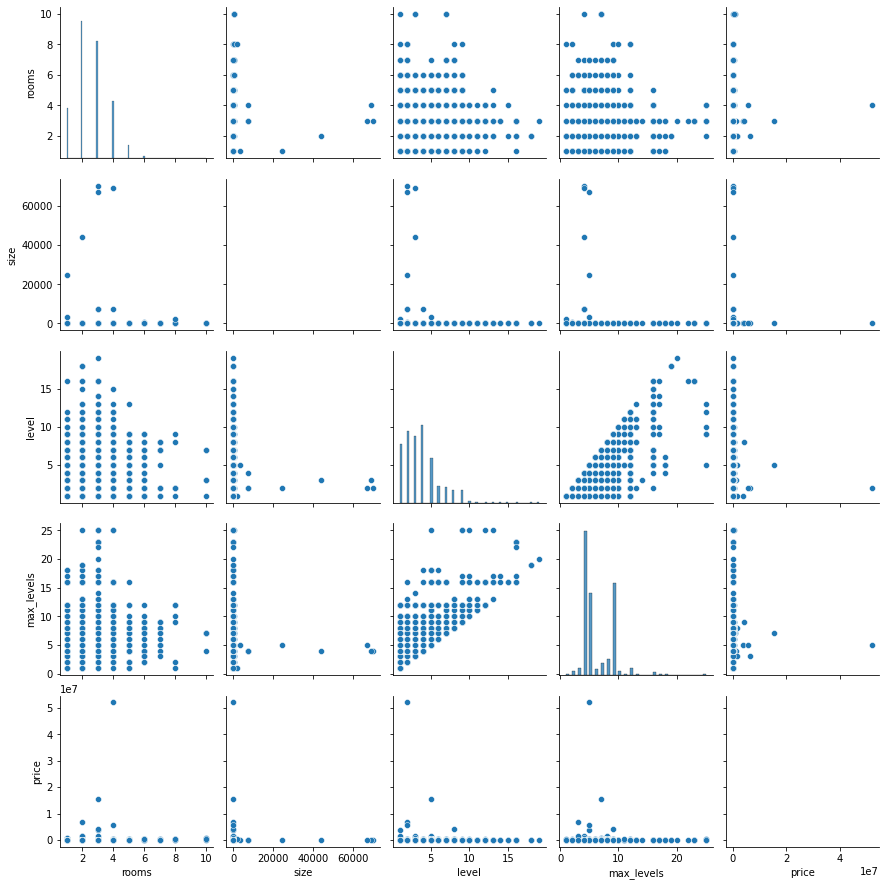

In [65]:
sns.pairplot(df)

In [67]:
df.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.027875,0.133536,0.177717,0.056176
size,0.027875,1.000000,-0.011031,-0.011091,0.001106
level,0.133536,-0.011031,1.000000,0.591807,-0.003454
max_levels,0.177717,-0.011091,0.591807,1.000000,0.011168
price,0.056176,0.001106,-0.003454,0.011168,1.000000


In [68]:
df.district.value_counts().index

Index(['Чиланзарский', 'Мирзо-Улугбекский', 'Юнусабадский', 'Учтепинский',
       'Мирабадский', 'Яккасарайский', 'Яшнободский', 'Шайхантахурский',
       'Олмазорский', 'Сергелийский', 'Янгихаётский', 'Бектемирский'],
      dtype='object')

In [69]:
dic = {'Чиланзарский' : 1, 
       'Мирзо-Улугбекский' : 2, 
       'Юнусабадский' : 3, 
       'Учтепинский' : 4,
       'Мирабадский' : 5, 
       'Яккасарайский' : 6, 
       'Яшнободский' : 7, 
       'Шайхантахурский' : 8,
       'Олмазорский' : 9, 
       'Сергелийский' : 10, 
       'Янгихаётский' : 11, 
       'Бектемирский' : 12
       }
       
def change(x):
  return dic[x]

In [70]:
df['district'] = df['district'].apply(change)

In [71]:
df.district

0       3
1       6
2       1
3       1
4       1
       ..
7560    7
7561    7
7562    8
7563    2
7564    1
Name: district, Length: 7565, dtype: int64

In [72]:
df.corr()

,district,rooms,size,level,max_levels,price
district,1.000000,0.115479,0.006786,0.105502,0.176671,0.013291
rooms,0.115479,1.000000,0.027875,0.133536,0.177717,0.056176
size,0.006786,0.027875,1.000000,-0.011031,-0.011091,0.001106
level,0.105502,0.133536,-0.011031,1.000000,0.591807,-0.003454
max_levels,0.176671,0.177717,-0.011091,0.591807,1.000000,0.011168
price,0.013291,0.056176,0.001106,-0.003454,0.011168,1.000000


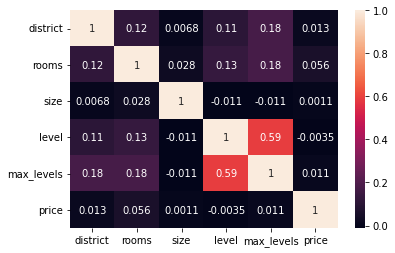

In [73]:
sns.heatmap(df.corr(), annot=True)

In [99]:
df = df.drop(['location'], axis=1)

In [100]:
df.head()

,district,rooms,size,level,max_levels,price
0,3,3,57.0,4,4,52000.0
1,6,2,52.0,4,5,56000.0
2,1,2,42.0,4,4,37000.0
3,1,3,65.0,1,4,49500.0
4,1,3,70.0,3,5,55000.0


In [101]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df)
df_ar = imputer.transform(df)
df = pd.DataFrame(df_ar, columns=df.columns, index=df.index)

In [102]:
df

,district,rooms,size,level,max_levels,price
0,3.0,3.0,57.0,4.0,4.0,52000.0
1,6.0,2.0,52.0,4.0,5.0,56000.0
2,1.0,2.0,42.0,4.0,4.0,37000.0
3,1.0,3.0,65.0,1.0,4.0,49500.0
4,1.0,3.0,70.0,3.0,5.0,55000.0
...,...,...,...,...,...,...
7560,7.0,1.0,38.0,5.0,5.0,24500.0
7561,7.0,2.0,49.0,1.0,4.0,32000.0
7562,8.0,2.0,64.0,3.0,9.0,40000.0
7563,2.0,1.0,18.0,1.0,4.0,11000.0


In [103]:
X = df.drop(['price'], axis=1)
X

,district,rooms,size,level,max_levels
0,3.0,3.0,57.0,4.0,4.0
1,6.0,2.0,52.0,4.0,5.0
2,1.0,2.0,42.0,4.0,4.0
3,1.0,3.0,65.0,1.0,4.0
4,1.0,3.0,70.0,3.0,5.0
...,...,...,...,...,...
7560,7.0,1.0,38.0,5.0,5.0
7561,7.0,2.0,49.0,1.0,4.0
7562,8.0,2.0,64.0,3.0,9.0
7563,2.0,1.0,18.0,1.0,4.0


In [104]:
y = df['price']
y

0       52000.0
1       56000.0
2       37000.0
3       49500.0
4       55000.0
         ...   
7560    24500.0
7561    32000.0
7562    40000.0
7563    11000.0
7564    22914.0
Name: price, Length: 7565, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [108]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [109]:
coeff_df = pd.DataFrame(LR_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
district,1982.135923
rooms,33874.289825
size,-0.425801
level,-5347.866975
max_levels,2840.996854


In [110]:
predictions = LR_model.predict(X_test)

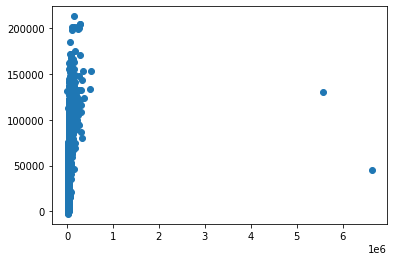

In [111]:
plt.scatter(y_test, predictions)

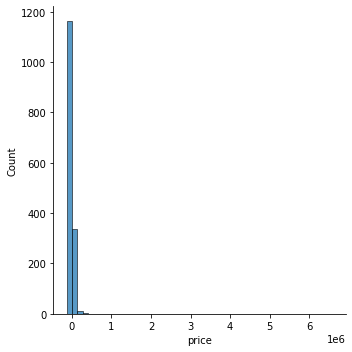

In [112]:
sns.displot((y_test-predictions), bins=50);

In [113]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
mae

36246.36052562288

In [114]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
np.sqrt(mse)

223281.45977137107

In [117]:
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
277,2.0,2.0,62.0,5.0,5.0
5110,8.0,2.0,57.0,3.0,4.0
2774,7.0,4.0,141.0,2.0,8.0
2234,2.0,2.0,40.0,2.0,5.0
1170,4.0,3.0,75.0,5.0,5.0


In [118]:
test_label = y.loc[test_data.index]
test_label

277     33500.0
5110    40000.0
2774    87500.0
2234    40000.0
1170    48000.0
Name: price, dtype: float64

In [120]:
predicted_data = LR_model.predict(test_data)
predicted_data

array([ 37179.78210652,  56929.46374737, 139371.99458051,  53232.75065182,
        75012.80836522])

In [121]:
pd.DataFrame({'Forecasted price': predicted_data, 'Real price': test_label})

,Forecasted price,Real price
277,37179.782107,33500.0
5110,56929.463747,40000.0
2774,139371.994581,87500.0
2234,53232.750652,40000.0
1170,75012.808365,48000.0


In [122]:
### mean_absolute_error
mae

36246.36052562288

In [123]:
### mean_squared_error
np.sqrt(mse)

223281.45977137107